In [1]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://apache.osuosl.org/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
!tar xf spark-2.4.4-bin-hadoop2.7.tgz
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"

import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

Hit:1 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic/main Sources [1,728 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 Packages [1,

In [0]:
from pyspark import SparkContext
sc = spark.sparkContext

In [3]:
import keras
from keras.datasets import cifar100
import numpy as np

Using TensorFlow backend.


In [4]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

169009152/169001437 [==============================] - 6s 0us/step


In [0]:
#50000,32*32*3

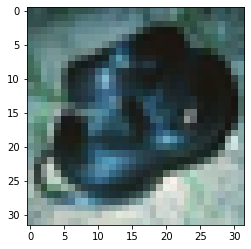

In [6]:
from matplotlib import pyplot as plt
img = x_train[40]
#.reshape(3,32,32).transpose([1, 2, 0])
plt.imshow(img, interpolation='nearest');

In [0]:
x_train_reshaped = x_train.reshape(50000,32*32*3)

In [0]:
zrdd = sc.parallelize(list(x_train_reshaped))
#df = zrdd.map(lambda x: x.tolist()).toDF()

In [0]:
df = zrdd.map(lambda x: x.tolist()).toDF()

In [10]:
df.show(2)

+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+---

In [0]:
x_train_reshaped_reshaped = x_train_reshaped.reshape(50000,32,32,3) # reshaped the flattened image to normal image

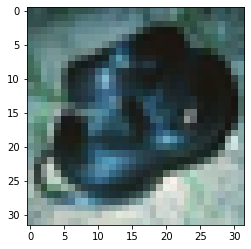

In [12]:
from matplotlib import pyplot as plt
img = x_train_reshaped_reshaped[40]
#.reshape(3,32,32).transpose([1, 2, 0])
plt.imshow(img, interpolation='nearest');

In [13]:
type(y_train)

numpy.ndarray

In [14]:
type(y_train.tolist())

list

In [15]:
xx= list(y_train) #type(xx)
vv=sc.parallelize(y_train.tolist()) #type(vv)
sorted(vv.flatMap(lambda x:x).distinct().collect())[10] #np.unique(y_train)

10

In [0]:
coarse_label_rdd = sc.parallelize([
'apple', # id 0
'aquarium_fish',
'baby',
'bear',
'beaver',
'bed',
'bee',
'beetle',
'bicycle',
'bottle',
'bowl',
'boy',
'bridge',
'bus',
'butterfly',
'camel',
'can',
'castle',
'caterpillar',
'cattle',
'chair',
'chimpanzee',
'clock',
'cloud',
'cockroach',
'couch',
'crab',
'crocodile',
'cup',
'dinosaur',
'dolphin',
'elephant',
'flatfish',
'forest',
'fox',
'girl',
'hamster',
'house',
'kangaroo',
'computer_keyboard',
'lamp',
'lawn_mower',
'leopard',
'lion',
'lizard',
'lobster',
'man',
'maple_tree',
'motorcycle',
'mountain',
'mouse',
'mushroom',
'oak_tree',
'orange',
'orchid',
'otter',
'palm_tree',
'pear',
'pickup_truck',
'pine_tree',
'plain',
'plate',
'poppy',
'porcupine',
'possum',
'rabbit',
'raccoon',
'ray',
'road',
'rocket',
'rose',
'sea',
'seal',
'shark',
'shrew',
'skunk',
'skyscraper',
'snail',
'snake',
'spider',
'squirrel',
'streetcar',
'sunflower',
'sweet_pepper',
'table',
'tank',
'telephone',
'television',
'tiger',
'tractor',
'train',
'trout',
'tulip',
'turtle',
'wardrobe',
'whale',
'willow_tree',
'wolf',
'woman',
'worm',
])

In [17]:
coarse_label_rdd.count()

100

In [0]:
k = coarse_label_rdd.zipWithIndex() #getting indexes for labels 

In [19]:
k.collect()

[('apple', 0),
 ('aquarium_fish', 1),
 ('baby', 2),
 ('bear', 3),
 ('beaver', 4),
 ('bed', 5),
 ('bee', 6),
 ('beetle', 7),
 ('bicycle', 8),
 ('bottle', 9),
 ('bowl', 10),
 ('boy', 11),
 ('bridge', 12),
 ('bus', 13),
 ('butterfly', 14),
 ('camel', 15),
 ('can', 16),
 ('castle', 17),
 ('caterpillar', 18),
 ('cattle', 19),
 ('chair', 20),
 ('chimpanzee', 21),
 ('clock', 22),
 ('cloud', 23),
 ('cockroach', 24),
 ('couch', 25),
 ('crab', 26),
 ('crocodile', 27),
 ('cup', 28),
 ('dinosaur', 29),
 ('dolphin', 30),
 ('elephant', 31),
 ('flatfish', 32),
 ('forest', 33),
 ('fox', 34),
 ('girl', 35),
 ('hamster', 36),
 ('house', 37),
 ('kangaroo', 38),
 ('computer_keyboard', 39),
 ('lamp', 40),
 ('lawn_mower', 41),
 ('leopard', 42),
 ('lion', 43),
 ('lizard', 44),
 ('lobster', 45),
 ('man', 46),
 ('maple_tree', 47),
 ('motorcycle', 48),
 ('mountain', 49),
 ('mouse', 50),
 ('mushroom', 51),
 ('oak_tree', 52),
 ('orange', 53),
 ('orchid', 54),
 ('otter', 55),
 ('palm_tree', 56),
 ('pear', 57),
 ('

In [0]:
electronics = k.filter(lambda x : x[0] in ['clock', 'computer_keyboard', 'lamp', 'telephone', 'television'])

In [21]:
electronics.collect()

[('clock', 22),
 ('computer_keyboard', 39),
 ('lamp', 40),
 ('telephone', 86),
 ('television', 87)]

In [0]:
furniture = k.filter(lambda x : x[0] in ['bed', 'chair', 'couch', 'table', 'wardrobe'])

In [23]:
furniture.collect()

[('bed', 5), ('chair', 20), ('couch', 25), ('table', 84), ('wardrobe', 94)]

In [0]:
index_h=electronics.union(furniture)

In [0]:
index_h = index_h.map(lambda x : x[1])

In [26]:
index_h.collect()

[22, 39, 40, 86, 87, 5, 20, 25, 84, 94]

In [27]:
y_train.shape

(50000, 1)

In [0]:
#xx= list(y_train) #type(xx)
#vv=sc.parallelize(y_train.tolist()) #type(vv)
#sorted(vv.flatMap(lambda x:x).distinct().collect())[10] #np.unique(y_train)

In [0]:
df_y = vv.toDF()

In [30]:
df_y.show(2) #df_y is a dataframe

+---+
| _1|
+---+
| 19|
| 29|
+---+
only showing top 2 rows



In [0]:
list_indexes = index_h.collect()

In [32]:
df_y.show(2)

+---+
| _1|
+---+
| 19|
| 29|
+---+
only showing top 2 rows



In [0]:
from pyspark.sql.functions import monotonically_increasing_id 

df_index = df_y.select("*").withColumn("id", monotonically_increasing_id()) #to generate indexes 

In [34]:
df_index.show(2)

+---+---+
| _1| id|
+---+---+
| 19|  0|
| 29|  1|
+---+---+
only showing top 2 rows



In [35]:
df_index.count()

50000

In [0]:
df_y_filterd_id = df_index.filter(df_index._1.isin([22, 39, 40, 86, 87, 5, 20, 25, 84, 94]))

In [37]:
df_y_filterd_id.count(), len(df_y_filterd_id.columns)

(5000, 2)

In [38]:
df_y_filterd_id.select('id').count()

5000

In [0]:
nn= df_y_filterd_id.select('id').collect()

In [0]:
mvv_array = [int(row.id) for row in nn]

In [0]:
#mvv_array

In [0]:
df_y_filterd_id = df_y_filterd_id.select('id').collect()

In [43]:
type(df_y_filterd_id)

list

In [44]:
df_y.filter(df_y._1.isin([22, 39, 40, 86, 87, 5, 20, 25, 84, 94])).count() #ytrain_filtered our data

5000

In [45]:
df.show(2) #xtrain data

+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+---

In [0]:
df_x_index = df.select("*").withColumn("id", monotonically_increasing_id())

In [47]:
df_x_index.columns[-1]

'id'

In [0]:
df_x_index_final = df_x_index.filter(df_x_index.id.isin(mvv_array)) #x_train_with_our_images

In [0]:
df_x_noid = df_x_index_final.drop("id") #Drop id column in x_train

In [50]:
df_y_noid = df_y_filterd_id.drop("id")

AttributeError: ignored

In [0]:
df_x_noid.count(),len(df_x_noid.columns)

In [0]:
df_y_noid.count(),len(df_y_noid.columns)

df_x_noid --> x_train <br>
df_y_noid --> y_train

In [0]:
type(df_x_noid)

In [0]:
df_x_noid.first()

In [0]:
df_x_noid.show(1)